## CP:DSAI FINAL PROJECT

## Psychiatric Disorder Classification From EEG Data Using Machine Learning

In [99]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import torch
import mne
from mne.channels import Layout as layout
from functools import partial
from math import ceil

In [100]:
df = pd.read_csv('data/EEG.machinelearing_data_BRMH.csv')

In [101]:
df.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


### Domain

- This study aims to examine the efficiency of different machine learning models when analyzing EEG to detect and compare major psychiatric disorders.

- Research has found that symptoms-focused diagnosis limits the focus of treatment to symptom relief only. Therefore, data-driven approaches to study neural mechanisms are being used as a diagnostic aid. 

- Advances in data and computational science are rapidly changing and use of ML here assesses the performance of predictions on unseen data thereby, providing individualized information and yielding results that may have high level of clinical translation.

### Dataset collection (from authors)

- The data set consists of medical records, intelligent quotient (IQ) scores from psychological assessments, and quantitative EEG (QEEG) at resting state assessment

- Data size: total sample is 945 (850-psychiatric disorder patients; 95-healthy control)

- Inclusion criteria: 
    - Age of subjects - 18 to 70 years
    - Diagnosis which fall into 6 main disorders (one healthy control) and 9 specific disorders


### Data Explain

In [102]:
df.describe()

,no.,age,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
count,945.000000,945.000000,930.000000,932.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,...,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,473.000000,30.594804,13.438710,101.580472,20.182936,21.177584,17.749553,18.901698,20.447079,19.490329,...,75.889633,55.049113,56.959796,60.739169,69.829254,47.862489,66.832798,39.301406,66.153213,57.056207
std,272.942302,11.781592,2.550461,17.022414,11.282022,12.230662,10.003598,9.079482,9.742912,9.252500,...,15.861641,19.541956,18.326785,18.052887,17.725321,19.685722,17.028701,20.790933,18.088548,19.600107
min,1.000000,18.000000,0.000000,49.000000,3.272260,3.244199,3.050507,3.412618,5.066593,4.048931,...,12.611954,0.519048,6.926792,0.708008,2.421748,0.036664,1.032207,1.228502,0.363268,3.988805
25%,237.000000,21.730000,12.000000,91.000000,12.784872,13.019269,11.134327,12.460586,13.548645,12.637717,...,68.014443,41.607506,43.682444,48.374883,58.937785,32.581046,55.872070,22.049743,54.710605,43.955229
50%,473.000000,26.150000,13.000000,102.000000,17.065286,17.838251,15.541469,16.733004,18.065276,17.432568,...,78.647712,55.158858,56.657348,61.257972,72.298636,45.719426,68.238375,36.549938,67.988937,57.515871
75%,709.000000,35.450000,16.000000,114.000000,24.492760,25.654394,21.623961,23.347900,25.573096,23.956748,...,87.398387,69.740640,70.649245,73.979100,83.066877,62.081839,79.192418,54.169209,79.527764,71.626382
max,945.000000,71.880000,20.000000,145.000000,92.826192,101.515687,91.373456,82.544167,101.566662,77.197502,...,99.678649,100.000000,99.307895,100.000000,99.581629,98.720067,99.650154,98.413320,100.000000,99.287092


### Hypothesis

- Main Psychiatric Disorders can be classified using EEG signal data
- Since the data is in the frequency domain, Machine Learning approach may perform better than Deep Learning.


### Intuition 

- Patient's demographic data will have no relevance for disorder classification

## EDA (Non-Signal)

In [103]:
len(df['specific.disorder'].unique())

12

In [104]:
df['main.disorder'].unique()

array(['Addictive disorder', 'Trauma and stress related disorder',
       'Mood disorder', 'Healthy control',
       'Obsessive compulsive disorder', 'Schizophrenia',
       'Anxiety disorder'], dtype=object)

In [105]:
df['specific.disorder'].unique()

array(['Alcohol use disorder', 'Acute stress disorder',
       'Depressive disorder', 'Healthy control',
       'Behavioral addiction disorder', 'Obsessive compulsitve disorder',
       'Schizophrenia', 'Panic disorder', 'Social anxiety disorder',
       'Posttraumatic stress disorder', 'Adjustment disorder',
       'Bipolar disorder'], dtype=object)

In [106]:
columns = df.columns

**Checking null values**

In [107]:
for col in columns:
    null_count = df[col].isna().sum()
    if null_count>0:      
        print(f'{col} null values: {null_count}')

education null values: 15
IQ null values: 13
Unnamed: 122 null values: 945


**Removing Unnamed: 122 because it is an empty column separating PSD and FC data**

In [108]:
df = df.drop(columns=['Unnamed: 122'])

In [109]:
#discrete column
dis_col = df.select_dtypes(include=['object']).columns
#continuous column
con_col = df.select_dtypes(include=['int64', 'float64']).columns

In [110]:
dis_col

Index(['sex', 'eeg.date', 'main.disorder', 'specific.disorder'], dtype='object')

In [111]:
con_col

Index(['no.', 'age', 'education', 'IQ', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       'AB.A.delta.c.F7', 'AB.A.delta.d.F3', 'AB.A.delta.e.Fz',
       'AB.A.delta.f.F4',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1144)

In [112]:
dis_col = dis_col.drop('eeg.date')

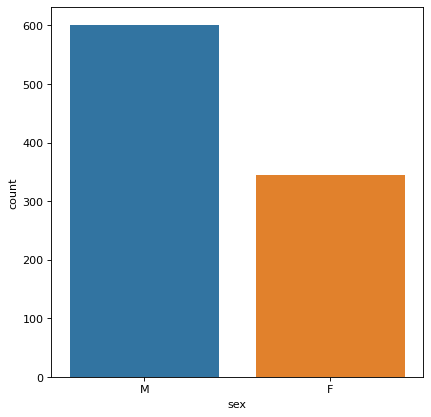

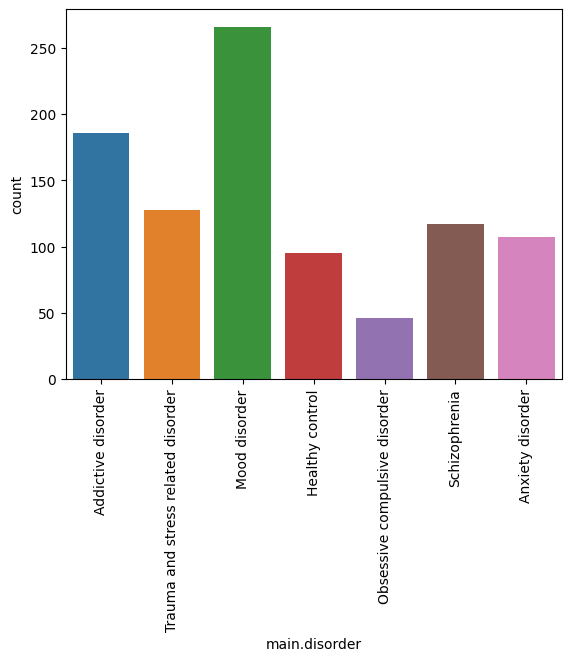

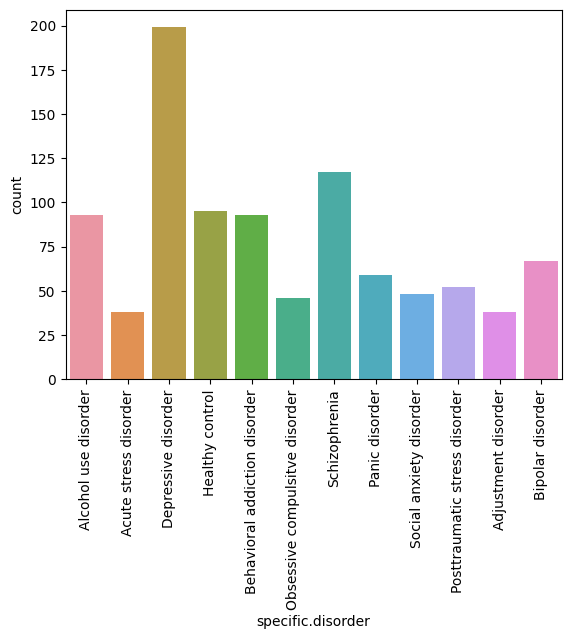

In [113]:
plt.figure(figsize=(6,6),dpi=80)
for dis in dis_col:
    sns.countplot(x=dis,data=df)
    if dis != "sex":
        plt.xticks(rotation=90)
    plt.show()

### CountPlot:

- **Male, Female** -> We have almost double male subjects than female subjects 
- **Main disorder** -> We have 6 main disorders and one is Healthy Control **(HC)**, Mood Disorder has the most data while Obsessive Compulsive Disorder **(OCD)** has the lowest amount of data
- **Specific Disorder** -> We have a total of 9 specific disorders where Schizophrenia, OCD and HC  have no specific disorder  others have 2-3 specific disorders 

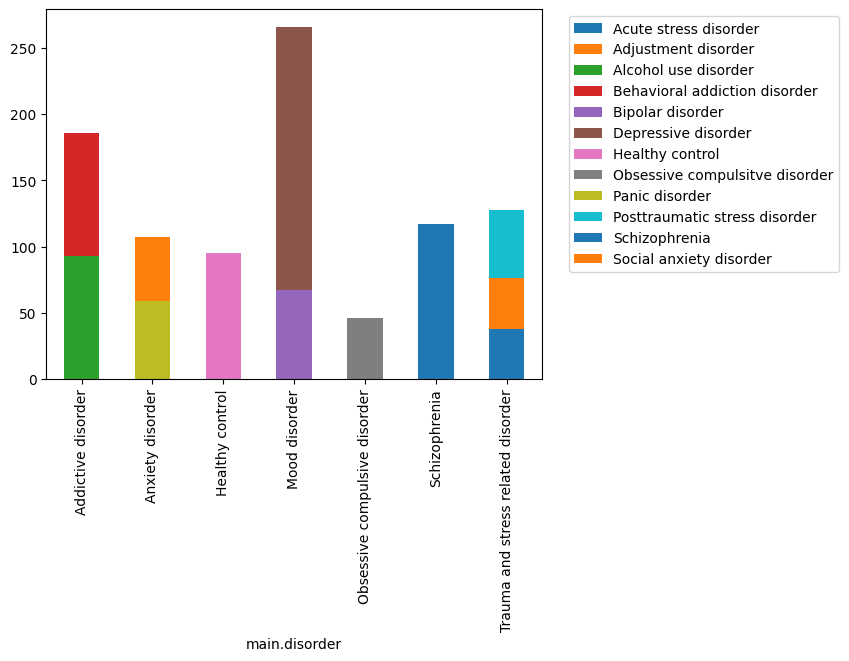

In [115]:
fig,ax = plt.subplots()
disorder_counts = df.groupby(['main.disorder', 'specific.disorder']).size()
disorder_counts.unstack('specific.disorder')\
    .plot(kind='bar', stacked=True, ax=ax)
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

### Observation:

Stacking the specific disorder over main disorder, from the above plot we can see that 
**HC, OCD and Schizophrenia** do not have specific disorders

- **Addictive Disorder** - Alcohol use disorder, Behavioral addiction disorder
- **Anxiety Disorder**   - Social Anxiety, Panic Disorder
- **Mood Disorder**      - Bipolar Disorder, Depressive Disorder
- **Trauma and Stress Related Disorder** - Posttraumatic stress disorder, Acute stress disorder, Adjustment Disorder


**Selecting only Categorical Non-Signal data**

### Sex vs Main Disorder 

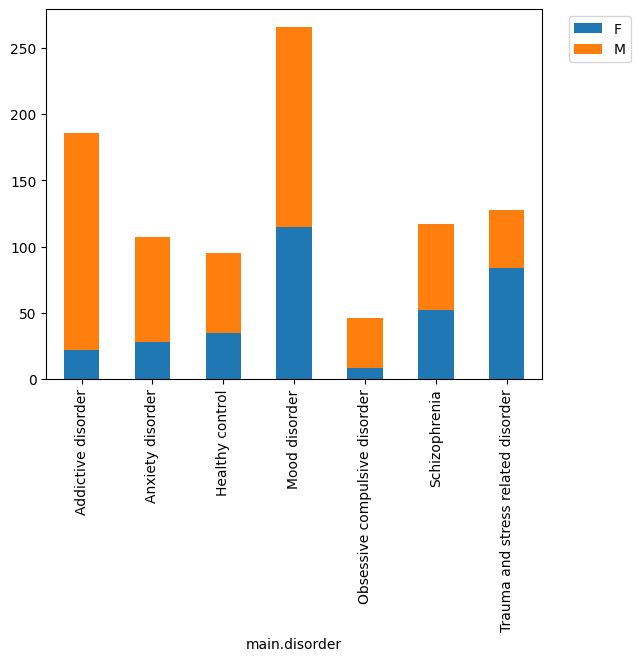

In [117]:
fig,ax = plt.subplots()
disorder_counts = df.groupby(['main.disorder', 'sex']).size()
disorder_counts.unstack('sex')\
    .plot(kind='bar', stacked=True, ax=ax)
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

In the above plot, we can see that the sex distribution of the Main Disorder where the most balanced proportion of Male to Female is in **Mood Disorder** followed by **Schizophrenia**. 

In [118]:
con_col

Index(['no.', 'age', 'education', 'IQ', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       'AB.A.delta.c.F7', 'AB.A.delta.d.F3', 'AB.A.delta.e.Fz',
       'AB.A.delta.f.F4',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1144)

**Selecting only Continuous Non-Signal data**

In [119]:
con_col = con_col.drop('no.')

selected_con = con_col[:3]

In [120]:
selected_con

Index(['age', 'education', 'IQ'], dtype='object')

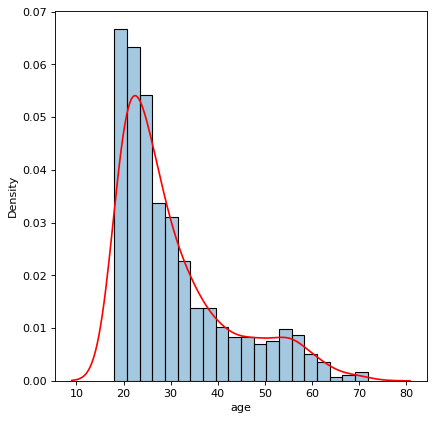

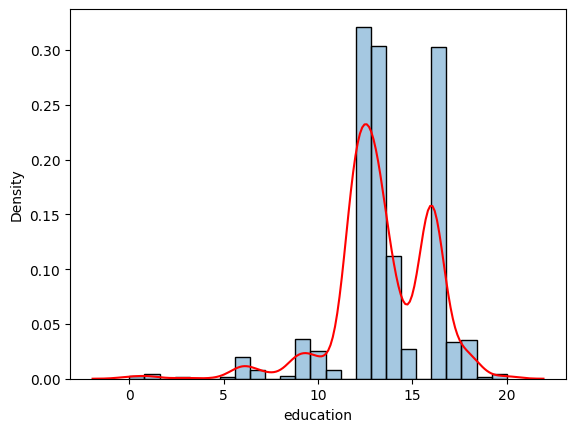

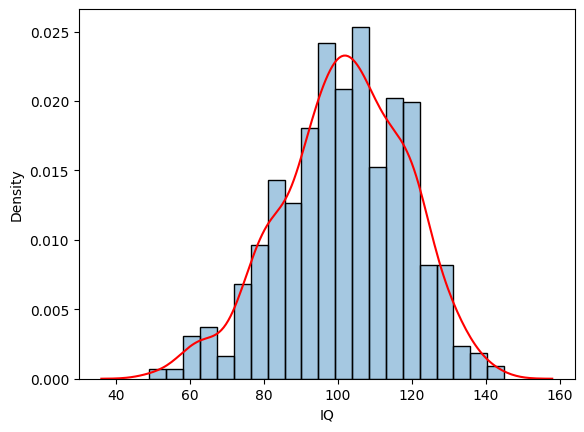

In [121]:
#Using histogram and KDE to visualize continuous non_signal data

plt.figure(figsize=(6, 6), dpi=80)

for con in selected_con:
    ax = sns.histplot(x = con, data = df,kde=False,alpha=0.4, stat='density')
    sns.kdeplot(data=df, x=con, color='red', ax=ax)
    plt.show()

### Age

<Figure size 300x300 with 0 Axes>

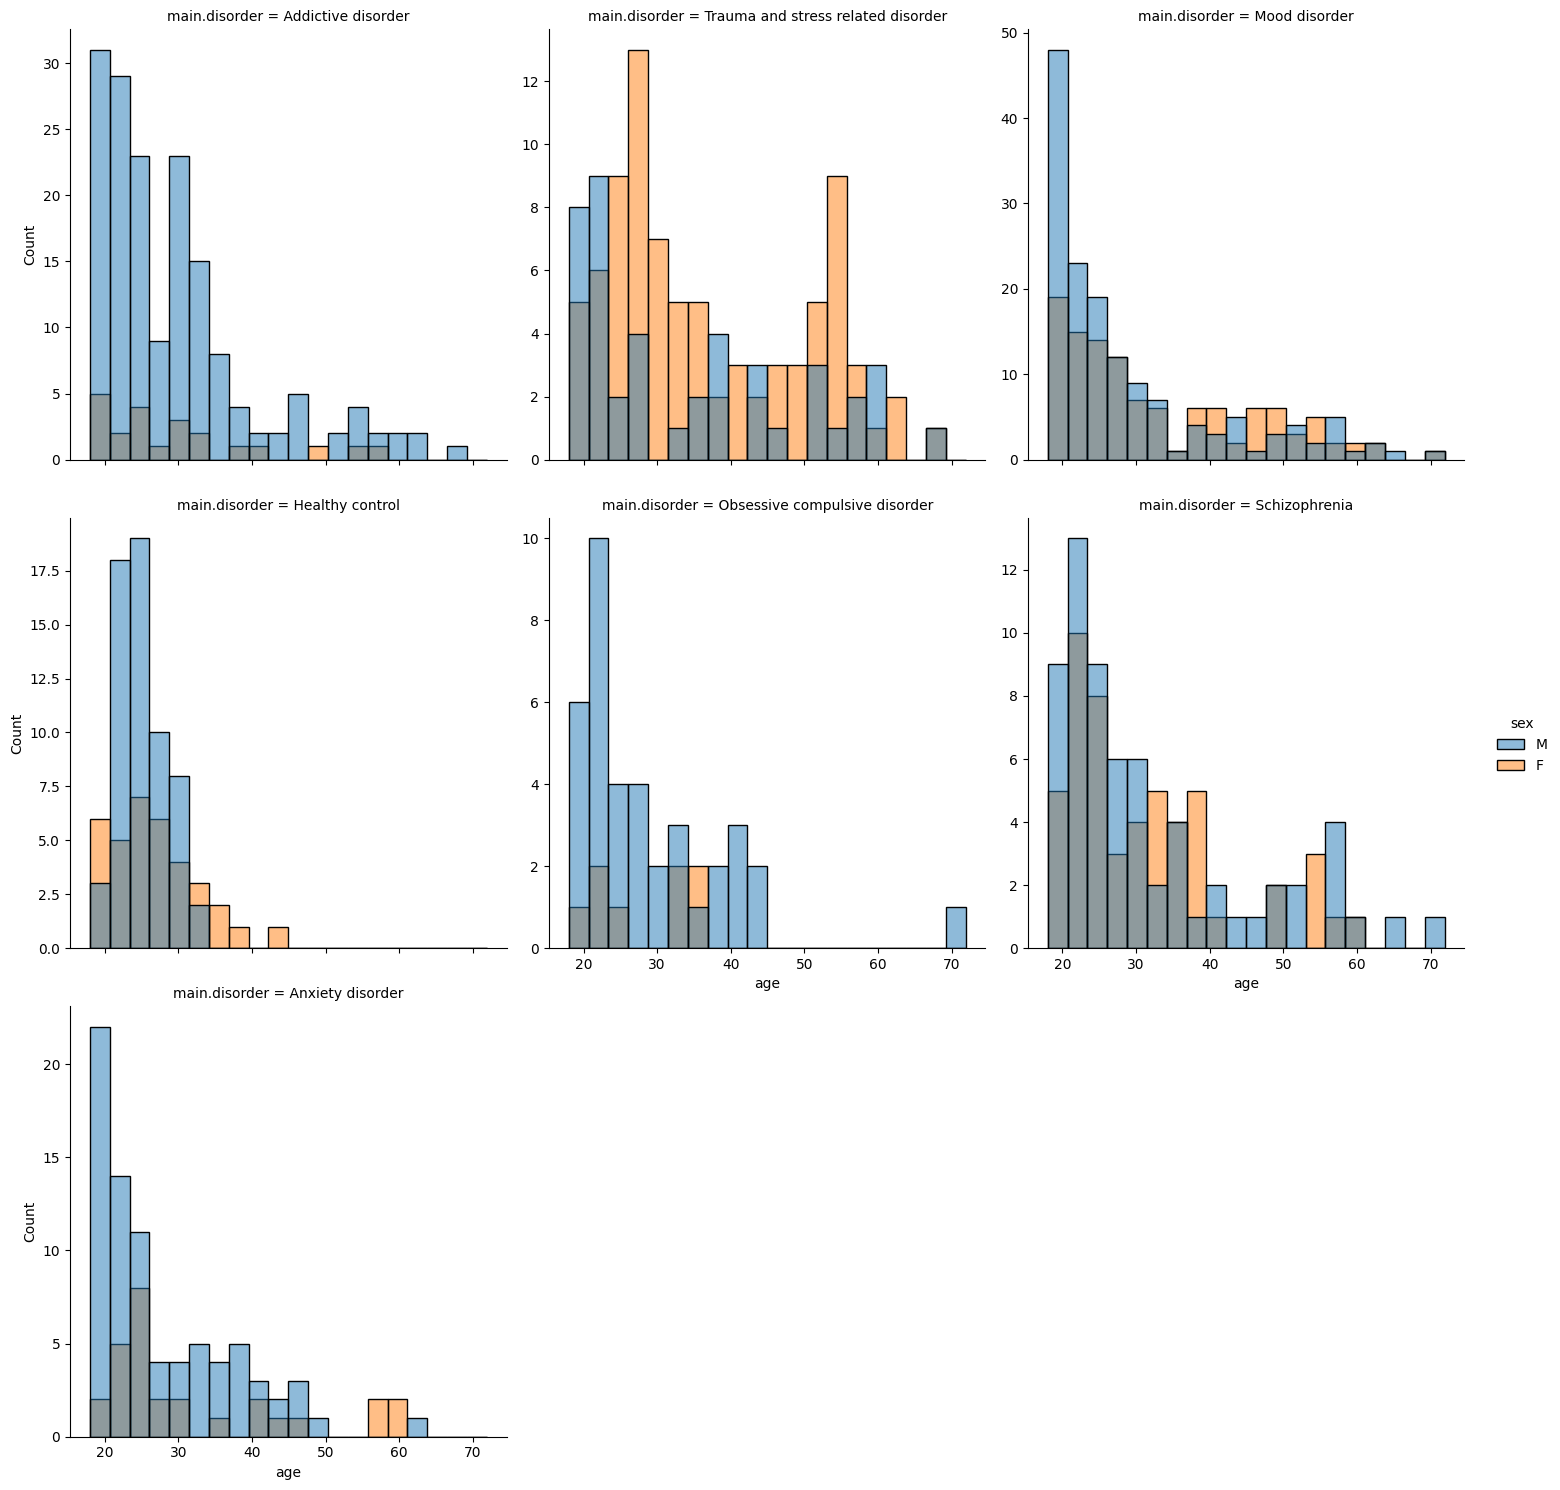

In [122]:
#Checking if continuous column data affects target variable's distribution
info = df.loc[:,'sex':'main.disorder']
displot = partial(sns.displot,
                  data=info, kind='hist',  
                  col_wrap=3,facet_kws={'sharey': False})
                  
plt.figure(figsize=(3,3))
displot(x='age', col='main.disorder', hue = 'sex')
plt.show()

Trauma and stress patients seem to be distributed across the age range while most other disorders are left skewed i.e. they are mostly within the age range of 18-30.

### Education

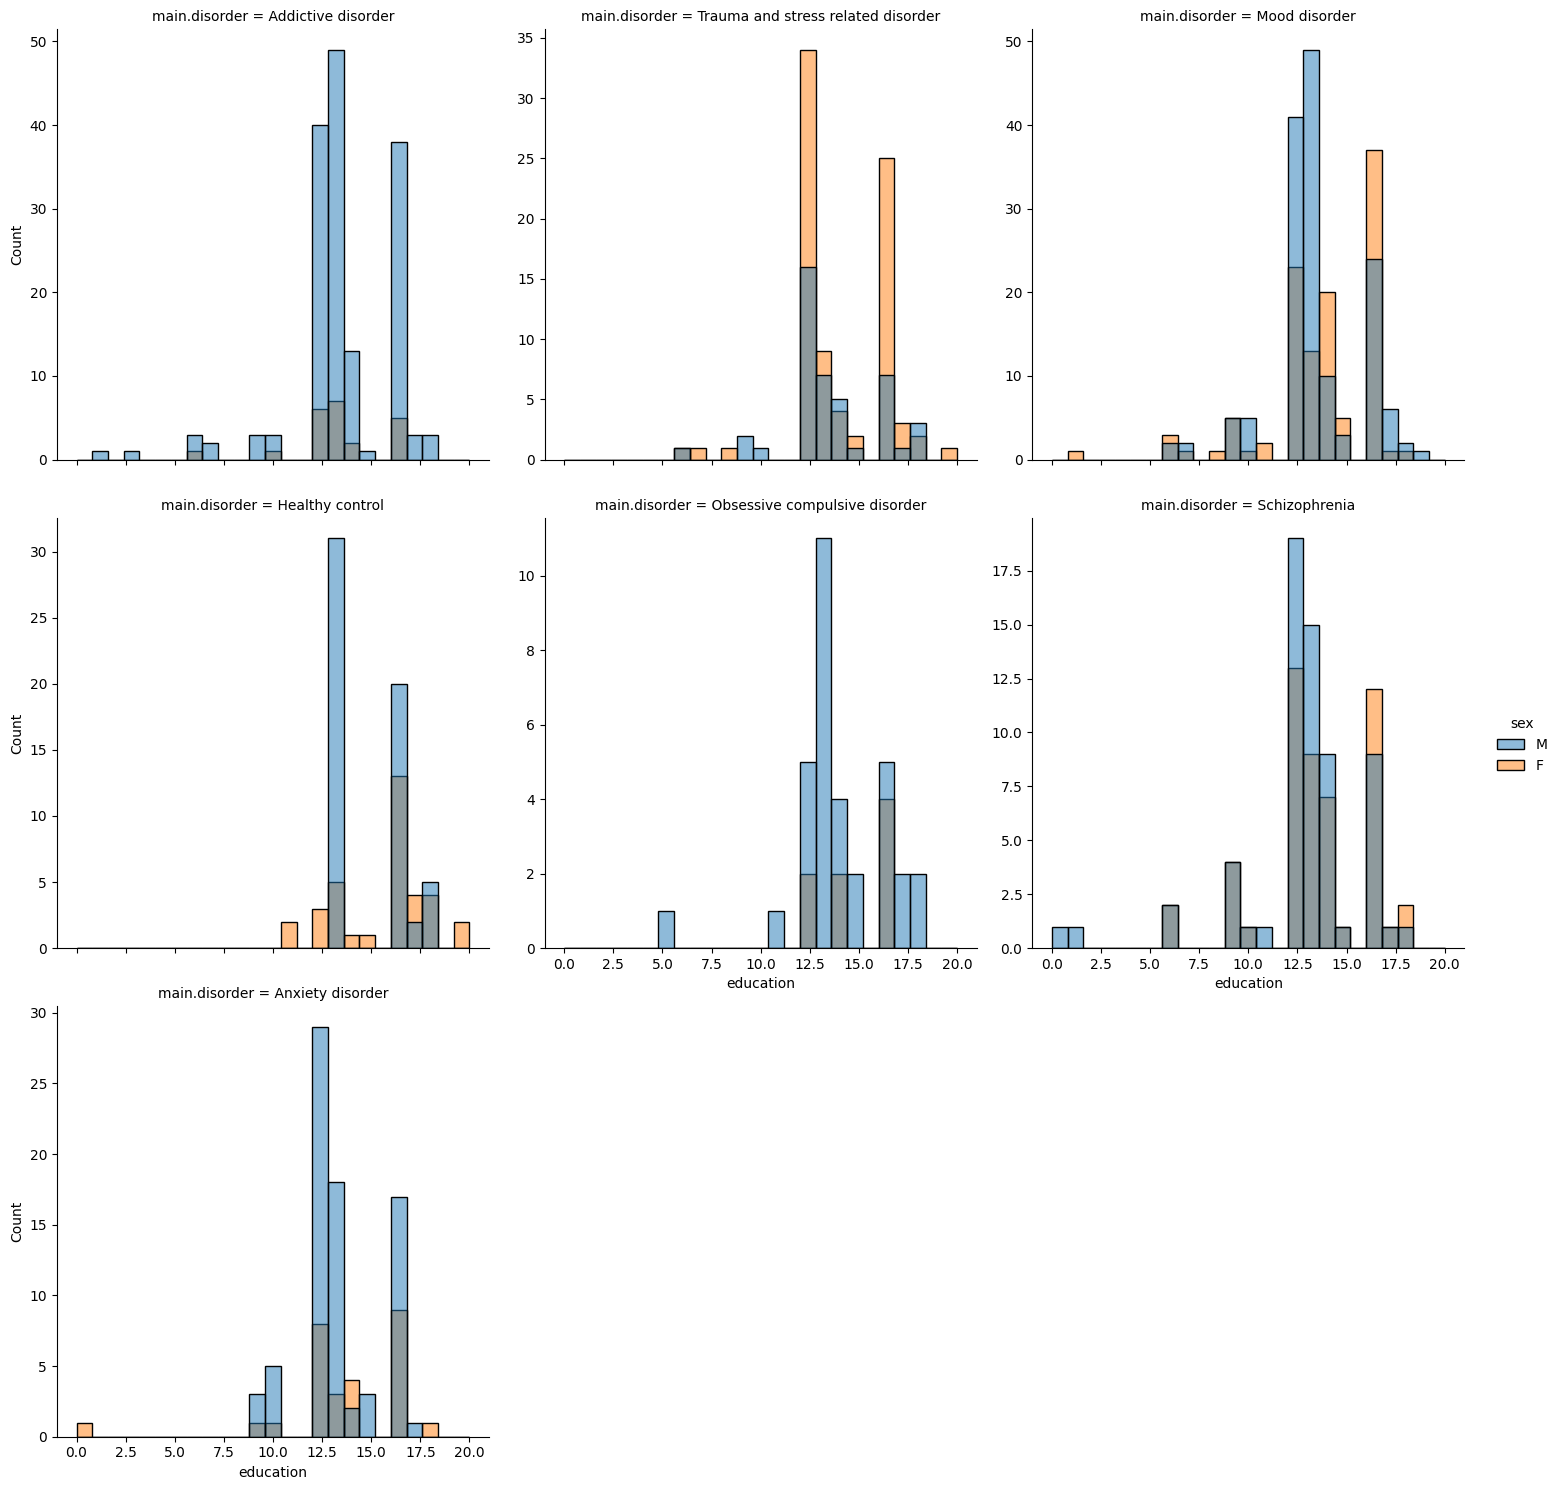

In [123]:
displot(x='education', col='main.disorder', hue='sex')
plt.show()

Education data has two peaks with not much noticeable difference between patients with disorder and HC.

### IQ

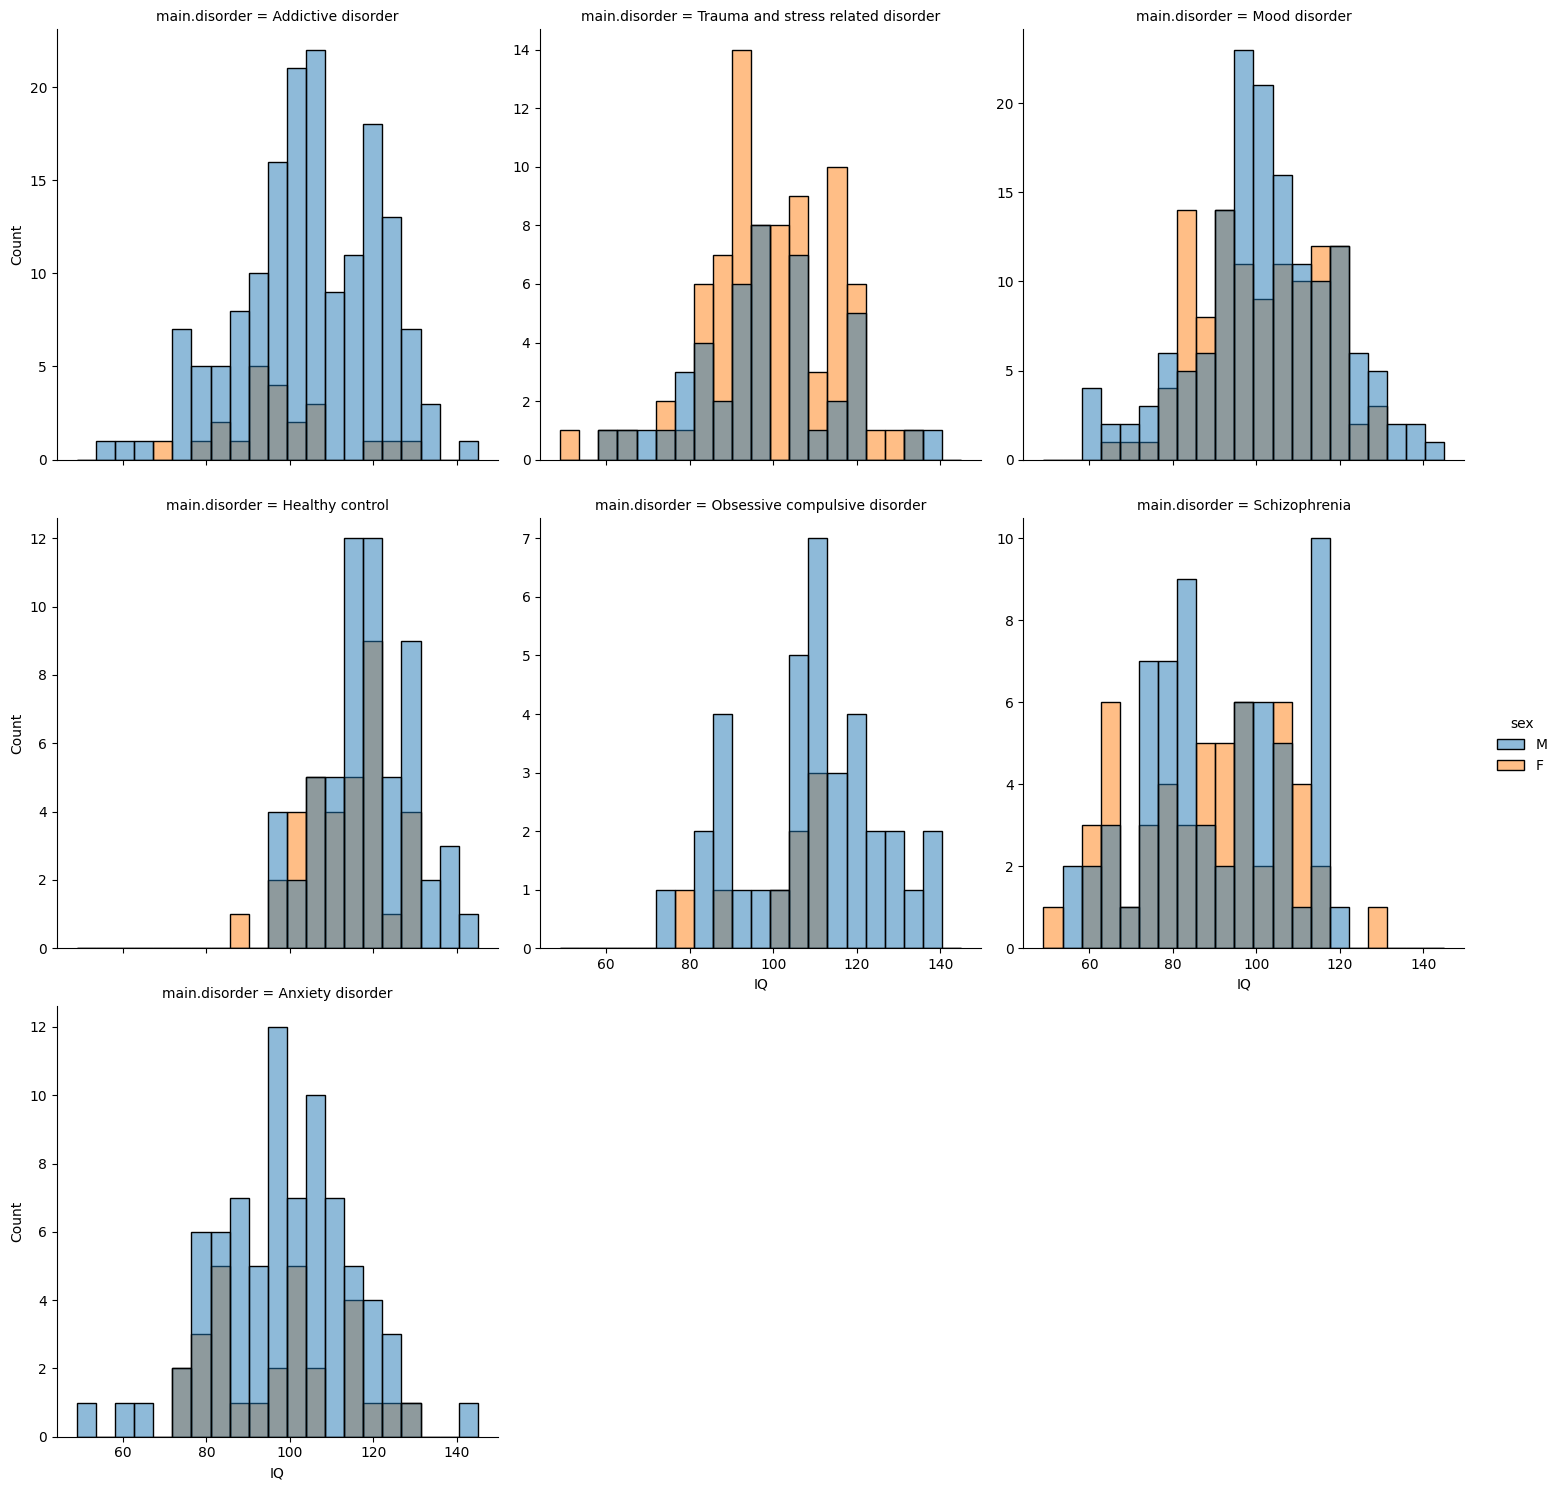

In [124]:
displot(x='IQ', col='main.disorder', hue='sex')
plt.show()

The IQ distribution according to main disorders does not seem to tell us anything new.

**Using Boxplot to look at quartile range of continuous data**

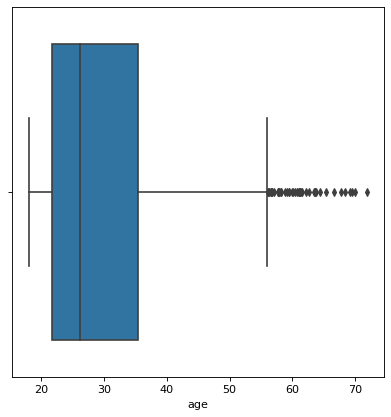

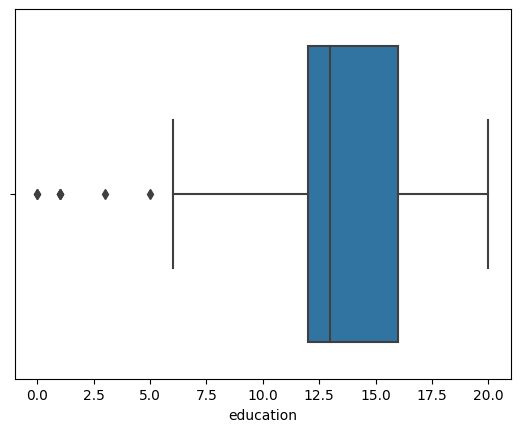

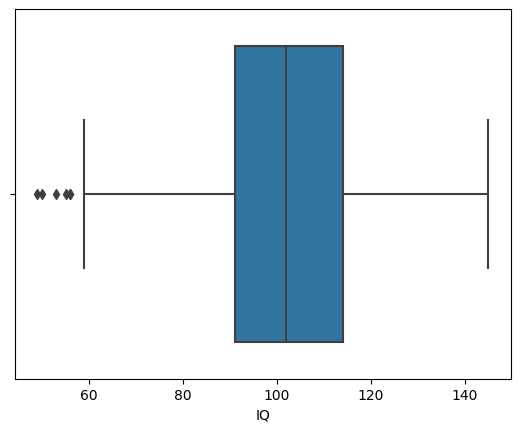

In [125]:
plt.figure(figsize=(6, 6), dpi=80)

for con in selected_con:
    sns.boxplot(x = df[con])
#     sns.kdeplot(data=df, x=con)
    plt.show()

**Looking at the box plot, we will be using median to fill the missing values**

### Filling Null values

In [126]:
df['education'].fillna(df['education'].median(), inplace=True)
df['IQ'].fillna(df['IQ'].median(), inplace=True)

In [127]:
columns = df.columns

for col in columns:
    null_count = df[col].isna().sum()
    if null_count>0:      
        print(f'{col} null values: {null_count}')
print('No missing values!')
        

No missing values!


In [128]:
df.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,13.0,102.0,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


# EDA (Signals)


The dataset has a total of 1149 columns among which 1140 are signal data consisting of Absolute Power (PSD) and Coherence (FC) of QEEG data.

### What is EEG?

- **Electroencephalography (EEG)** are signals collected from the neurons of the brain using electrodes placed on the surface of the human head.   


### Our EEG Dataset

- Brain Lobes
    - Frontal Lobe
    - Parietal Lobe
    - Temporal Lobe
    - Occipital Lobe
    - Central 
- Brain Lobes and Disorders
- Frequency Bands
- Electrode labellings


**QEEG PSD (power spectrum density) - absolute power value in each frequency band**

**QEEG FC (functional connectivity) - coherence for each band and channel**

### Using mne to analyze the signals

Let's start by defining the channels. In EEG there are a total of 128 electrodes that represent 128 channels but here in this dataset, we have a total of 19 channels that are a mix of all Central, Parietal, Occipital, Frontal and Temporal signals. 

For this, we define all the channels we need for the dataset and look at their positions.

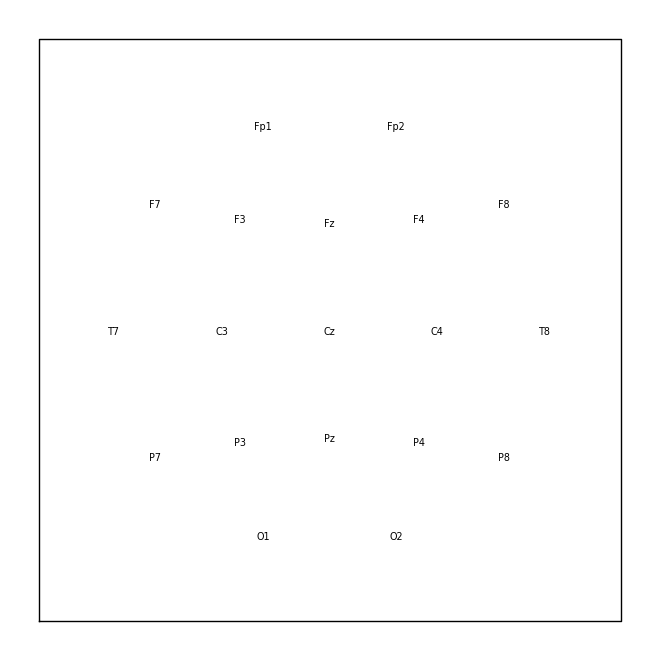

In [129]:
layout = mne.channels.read_layout("EEG1005")

selection = [
    "Fp1",
    "Fp2",
    "F3",
    "F4",
    "C3",
    "C4",
    "P3",
    "P4",
    "O1",
    "O2",
    "F7",
    "F8",
    "T7",
    "T8",
    "P7",
    "P8",
    "Fz",
    "Cz",
    "Pz",
]
picks = []
for channel in selection:
    picks.append(layout.names.index(channel))
display = layout.plot(picks=picks)

**Renaming PSD and FC signal columns for easier understanding**

In [130]:
# function to rename
def reformat_name(name):
    splitted = name.split(sep='.')
    if len(splitted) < 5:
        return name
    if splitted[0] != 'COH':
#         delta.F7
        result = f'{splitted[2]}.{splitted[4]}'
    else:
#       COH.gamma.Pz.P4  
        result = f'{splitted[0]}.{splitted[2]}.{splitted[4]}.{splitted[6]}'
    return result
# rename columns
df.rename(reformat_name, axis=1, inplace=True)
# show df
df.loc[:,"delta.FP1":]

,delta.FP1,delta.FP2,delta.F7,delta.F3,delta.Fz,delta.F4,delta.F8,delta.T3,delta.C3,delta.Cz,...,COH.gamma.Pz.P4,COH.gamma.Pz.T6,COH.gamma.Pz.O1,COH.gamma.Pz.O2,COH.gamma.P4.T6,COH.gamma.P4.O1,COH.gamma.P4.O2,COH.gamma.T6.O1,COH.gamma.T6.O2,COH.gamma.O1.O2
0,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,22.402246,22.582176,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,14.834740,10.950564,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,21.686306,18.367666,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,11.015078,11.639560,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,15.244523,17.041979,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,41.851823,36.771496,43.671792,36.860889,24.732236,23.607823,23.288260,7.520642,17.636528,20.220791,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,18.986856,19.401387,27.586436,20.194732,19.407491,20.216570,16.465027,13.178851,12.687296,20.257619,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,28.781317,32.369230,11.717778,23.134370,26.209302,25.484497,22.586688,11.368466,21.799254,36.083181,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,19.929100,25.196375,14.445391,16.453456,16.590649,16.007279,18.909188,13.438102,17.442777,18.859586,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


### Train test split

In [131]:
disorders = df['main.disorder'].unique()

In [132]:
disorders

array(['Addictive disorder', 'Trauma and stress related disorder',
       'Mood disorder', 'Healthy control',
       'Obsessive compulsive disorder', 'Schizophrenia',
       'Anxiety disorder'], dtype=object)

In [133]:
df['main.disorder'].value_counts()

Mood disorder                         266
Addictive disorder                    186
Trauma and stress related disorder    128
Schizophrenia                         117
Anxiety disorder                      107
Healthy control                        95
Obsessive compulsive disorder          46
Name: main.disorder, dtype: int64

In [134]:
from sklearn.utils import shuffle

indx ={}
for disorder in disorders:
    shuffle(df)
    idx= df[df['main.disorder'] == disorder].index
    indx[disorder] = idx

print(shuffle(indx['Addictive disorder']))

Int64Index([258,  61, 154, 239, 520, 455, 706,  14, 232, 838,
            ...
            150,  27,  26, 244, 909, 682,  64, 143, 386, 224],
           dtype='int64', length=186)


In [135]:
df.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,delta.FP1,delta.FP2,...,COH.gamma.Pz.P4,COH.gamma.Pz.T6,COH.gamma.Pz.O1,COH.gamma.Pz.O2,COH.gamma.P4.T6,COH.gamma.P4.O1,COH.gamma.P4.O2,COH.gamma.T6.O1,COH.gamma.T6.O2,COH.gamma.O1.O2
0,1,M,57.0,2012.8.30,13.0,102.0,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [136]:
print(indx['Addictive disorder'])

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            825, 834, 838, 861, 867, 876, 894, 905, 907, 909],
           dtype='int64', length=186)


In [137]:
indx

{'Addictive disorder': Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             825, 834, 838, 861, 867, 876, 894, 905, 907, 909],
            dtype='int64', length=186),
 'Trauma and stress related disorder': Int64Index([ 31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
             ...
             844, 848, 849, 854, 866, 870, 886, 889, 913, 917],
            dtype='int64', length=128),
 'Mood disorder': Int64Index([ 89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
             ...
             892, 893, 896, 897, 899, 900, 901, 903, 912, 915],
            dtype='int64', length=266),
 'Healthy control': Int64Index([113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
             126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 171,
             172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
             185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
             198, 199, 200, 201, 202, 20

In [138]:
disorders

array(['Addictive disorder', 'Trauma and stress related disorder',
       'Mood disorder', 'Healthy control',
       'Obsessive compulsive disorder', 'Schizophrenia',
       'Anxiety disorder'], dtype=object)

In [139]:
import random

test_idx = []
for disorder in disorders:
    idx= shuffle(indx[disorder])
#     shuffled_index = random.shuffle(np.arange(0,10))
#     print(shuffled_index)
    test_idx.append(idx[0:10])
    
    

In [140]:
test_idx

[Int64Index([220, 301, 65, 166, 72, 9, 68, 161, 909, 646], dtype='int64'),
 Int64Index([393, 44, 717, 677, 320, 820, 40, 666, 534, 525], dtype='int64'),
 Int64Index([597, 783, 763, 482, 812, 635, 544, 606, 399, 757], dtype='int64'),
 Int64Index([181, 137, 176, 204, 192, 136, 127, 130, 187, 921], dtype='int64'),
 Int64Index([453, 758, 268, 600, 748, 275, 683, 881, 599, 895], dtype='int64'),
 Int64Index([517, 629, 747, 468, 375, 363, 908, 418, 492, 357], dtype='int64'),
 Int64Index([731, 480, 528, 433, 633, 496, 577, 784, 702, 541], dtype='int64')]

In [141]:
test_idx= np.array(test_idx).flatten()

In [142]:
test_idx

array([220, 301,  65, 166,  72,   9,  68, 161, 909, 646, 393,  44, 717,
       677, 320, 820,  40, 666, 534, 525, 597, 783, 763, 482, 812, 635,
       544, 606, 399, 757, 181, 137, 176, 204, 192, 136, 127, 130, 187,
       921, 453, 758, 268, 600, 748, 275, 683, 881, 599, 895, 517, 629,
       747, 468, 375, 363, 908, 418, 492, 357, 731, 480, 528, 433, 633,
       496, 577, 784, 702, 541], dtype=int64)

In [143]:
len(test_idx)

70

In [144]:
a= np.arange(0,55)
np.random.shuffle(a)

In [145]:
df.shape

(945, 1148)

In [146]:
train_idx=[]
for x in range(df.shape[0]):
    if x not in test_idx:
        train_idx.append(x)

In [147]:
len(train_idx)

875

In [148]:
len(train_idx)+len(test_idx)

945

### Train Test split

In [149]:
type(test_idx)

numpy.ndarray

In [150]:
test_data = df.iloc[test_idx]

In [151]:
test_data.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,delta.FP1,delta.FP2,...,COH.gamma.Pz.P4,COH.gamma.Pz.T6,COH.gamma.Pz.O1,COH.gamma.Pz.O2,COH.gamma.P4.T6,COH.gamma.P4.O1,COH.gamma.P4.O2,COH.gamma.T6.O1,COH.gamma.T6.O2,COH.gamma.O1.O2
220,221,M,26.00,2016.6.2,16.0,99.0,Addictive disorder,Behavioral addiction disorder,20.873534,22.975771,...,79.802875,55.512578,47.349841,72.854763,70.196659,37.520812,73.157178,50.518897,81.384404,64.207918
301,302,M,30.99,2011.11.28,13.0,107.0,Addictive disorder,Alcohol use disorder,22.673611,18.851455,...,49.390753,76.120406,61.548068,70.168012,53.711601,41.115865,48.131848,66.125444,79.135269,63.046728
65,66,M,33.00,2016.6.4,13.0,93.0,Addictive disorder,Alcohol use disorder,37.334489,45.513278,...,82.247792,87.584324,64.015634,69.176069,95.392062,51.476474,77.265656,58.582392,80.236869,65.433131
166,167,M,22.00,2015.11.25,13.0,122.0,Addictive disorder,Behavioral addiction disorder,23.975863,25.263253,...,90.735192,75.540151,78.027528,63.805664,89.208544,70.440370,73.782798,65.218247,83.197908,67.137657
72,73,M,31.00,2017.1.26,13.0,104.0,Addictive disorder,Alcohol use disorder,22.407339,21.906231,...,62.256277,39.881849,42.716391,49.625644,67.682972,27.055540,56.649631,17.959207,52.352218,42.004466


In [152]:
test_data['main.disorder'].unique()

array(['Addictive disorder', 'Trauma and stress related disorder',
       'Mood disorder', 'Healthy control',
       'Obsessive compulsive disorder', 'Schizophrenia',
       'Anxiety disorder'], dtype=object)

In [153]:
train_data = df.iloc[train_idx]

In [154]:
train_data.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,delta.FP1,delta.FP2,...,COH.gamma.Pz.P4,COH.gamma.Pz.T6,COH.gamma.Pz.O1,COH.gamma.Pz.O2,COH.gamma.P4.T6,COH.gamma.P4.O1,COH.gamma.P4.O2,COH.gamma.T6.O1,COH.gamma.T6.O2,COH.gamma.O1.O2
0,1,M,57.0,2012.8.30,13.0,102.0,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [155]:
len(train_data)

875

In [156]:
train_data['main.disorder'].unique()

array(['Addictive disorder', 'Trauma and stress related disorder',
       'Mood disorder', 'Healthy control',
       'Obsessive compulsive disorder', 'Schizophrenia',
       'Anxiety disorder'], dtype=object)

In [157]:
type(train_data)

pandas.core.frame.DataFrame

In [158]:
# train_data.to_csv(r'train_data.csv', index=False, header=True)


In [159]:
# test_data.to_csv(r'test_data.csv', index=False, header=True)

### Removing Non signal data

In [160]:
signal_train = train_data.loc[:,'main.disorder':]
signal_test = test_data.loc[:,'main.disorder':]

In [161]:
signal_train

,main.disorder,specific.disorder,delta.FP1,delta.FP2,delta.F7,delta.F3,delta.Fz,delta.F4,delta.F8,delta.T3,...,COH.gamma.Pz.P4,COH.gamma.Pz.T6,COH.gamma.Pz.O1,COH.gamma.Pz.O2,COH.gamma.P4.T6,COH.gamma.P4.O1,COH.gamma.P4.O2,COH.gamma.T6.O1,COH.gamma.T6.O2,COH.gamma.O1.O2
0,Addictive disorder,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,Addictive disorder,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,Addictive disorder,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,Addictive disorder,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,Addictive disorder,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,Healthy control,Healthy control,41.851823,36.771496,43.671792,36.860889,24.732236,23.607823,23.288260,7.520642,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,Healthy control,Healthy control,18.986856,19.401387,27.586436,20.194732,19.407491,20.216570,16.465027,13.178851,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,Healthy control,Healthy control,28.781317,32.369230,11.717778,23.134370,26.209302,25.484497,22.586688,11.368466,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,Healthy control,Healthy control,19.929100,25.196375,14.445391,16.453456,16.590649,16.007279,18.909188,13.438102,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


In [162]:
signal_train = signal_train.drop(columns='specific.disorder',axis=1)

In [163]:
signal_test = signal_test.drop(columns='specific.disorder',axis=1)

In [164]:
signal_test

,main.disorder,delta.FP1,delta.FP2,delta.F7,delta.F3,delta.Fz,delta.F4,delta.F8,delta.T3,delta.C3,...,COH.gamma.Pz.P4,COH.gamma.Pz.T6,COH.gamma.Pz.O1,COH.gamma.Pz.O2,COH.gamma.P4.T6,COH.gamma.P4.O1,COH.gamma.P4.O2,COH.gamma.T6.O1,COH.gamma.T6.O2,COH.gamma.O1.O2
220,Addictive disorder,20.873534,22.975771,15.566051,26.082230,28.744176,21.263801,18.054858,12.958018,17.035728,...,79.802875,55.512578,47.349841,72.854763,70.196659,37.520812,73.157178,50.518897,81.384404,64.207918
301,Addictive disorder,22.673611,18.851455,15.967572,16.740629,18.526883,18.960004,15.433435,16.928534,20.408329,...,49.390753,76.120406,61.548068,70.168012,53.711601,41.115865,48.131848,66.125444,79.135269,63.046728
65,Addictive disorder,37.334489,45.513278,25.721546,28.017274,36.360602,33.956228,33.250557,16.411027,20.174983,...,82.247792,87.584324,64.015634,69.176069,95.392062,51.476474,77.265656,58.582392,80.236869,65.433131
166,Addictive disorder,23.975863,25.263253,17.626419,18.411314,19.941741,21.780704,16.387533,8.035987,13.092411,...,90.735192,75.540151,78.027528,63.805664,89.208544,70.440370,73.782798,65.218247,83.197908,67.137657
72,Addictive disorder,22.407339,21.906231,19.987776,24.197597,27.771192,27.164965,14.515485,8.838595,17.269515,...,62.256277,39.881849,42.716391,49.625644,67.682972,27.055540,56.649631,17.959207,52.352218,42.004466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Anxiety disorder,14.130239,14.830401,9.807669,14.249439,20.305220,21.530952,11.520427,9.149107,15.111159,...,41.571331,19.492939,34.502481,39.364328,21.935151,29.447507,39.732800,19.302539,30.038725,48.789057
577,Anxiety disorder,55.432518,64.250016,50.852848,58.255273,53.785248,49.496621,51.330970,29.401197,46.588339,...,86.696993,63.222181,82.097529,78.190251,68.071489,76.681097,79.132493,64.964141,69.968070,84.091275
784,Anxiety disorder,49.595482,88.509853,30.546205,28.122901,27.917185,26.632765,30.420981,11.648323,23.672154,...,77.292704,47.503857,40.049525,51.231739,72.001163,26.290042,52.639334,18.273099,54.481725,63.718819
702,Anxiety disorder,16.960698,23.467885,11.537615,12.496760,15.910448,15.040109,15.134345,5.305495,9.537778,...,90.525940,83.372977,73.249388,77.909301,90.508948,69.872411,81.347501,65.946155,84.198183,78.168272


In [165]:
X_train = signal_train.iloc[:,1:]
y_train = signal_train.iloc[:,0]



In [166]:
signal_train['main.disorder'].value_counts()

Mood disorder                         256
Addictive disorder                    176
Trauma and stress related disorder    118
Schizophrenia                         107
Anxiety disorder                       97
Healthy control                        85
Obsessive compulsive disorder          36
Name: main.disorder, dtype: int64

In [167]:
X_train

,delta.FP1,delta.FP2,delta.F7,delta.F3,delta.Fz,delta.F4,delta.F8,delta.T3,delta.C3,delta.Cz,...,COH.gamma.Pz.P4,COH.gamma.Pz.T6,COH.gamma.Pz.O1,COH.gamma.Pz.O2,COH.gamma.P4.T6,COH.gamma.P4.O1,COH.gamma.P4.O2,COH.gamma.T6.O1,COH.gamma.T6.O2,COH.gamma.O1.O2
0,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,22.402246,22.582176,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,14.834740,10.950564,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,21.686306,18.367666,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,11.015078,11.639560,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,15.244523,17.041979,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,41.851823,36.771496,43.671792,36.860889,24.732236,23.607823,23.288260,7.520642,17.636528,20.220791,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,18.986856,19.401387,27.586436,20.194732,19.407491,20.216570,16.465027,13.178851,12.687296,20.257619,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,28.781317,32.369230,11.717778,23.134370,26.209302,25.484497,22.586688,11.368466,21.799254,36.083181,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,19.929100,25.196375,14.445391,16.453456,16.590649,16.007279,18.909188,13.438102,17.442777,18.859586,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


In [168]:
X_train.shape,y_train.shape

((875, 1140), (875,))

In [169]:
from imblearn.over_sampling import SMOTE
sm1=SMOTE(random_state = 2)
X_train_res, y_train_res = sm1.fit_resample(X_train, y_train.ravel())

In [170]:
y_train_res.shape

(1792,)

In [171]:
X_train_res.shape

(1792, 1140)

In [172]:
type(y_train_res)

numpy.ndarray

In [173]:
y_train_res

array(['Addictive disorder', 'Addictive disorder', 'Addictive disorder',
       ..., 'Trauma and stress related disorder',
       'Trauma and stress related disorder',
       'Trauma and stress related disorder'], dtype=object)

In [174]:
y_train_SMOTE = pd.DataFrame(y_train_res)

In [175]:
y_train_SMOTE.value_counts()

Addictive disorder                    256
Anxiety disorder                      256
Healthy control                       256
Mood disorder                         256
Obsessive compulsive disorder         256
Schizophrenia                         256
Trauma and stress related disorder    256
dtype: int64

In [176]:
x_train_SMOTE = pd.DataFrame(X_train_res)

In [177]:
x_train_SMOTE

,delta.FP1,delta.FP2,delta.F7,delta.F3,delta.Fz,delta.F4,delta.F8,delta.T3,delta.C3,delta.Cz,...,COH.gamma.Pz.P4,COH.gamma.Pz.T6,COH.gamma.Pz.O1,COH.gamma.Pz.O2,COH.gamma.P4.T6,COH.gamma.P4.O1,COH.gamma.P4.O2,COH.gamma.T6.O1,COH.gamma.T6.O2,COH.gamma.O1.O2
0,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,22.402246,22.582176,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,14.834740,10.950564,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,21.686306,18.367666,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,11.015078,11.639560,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,15.244523,17.041979,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,15.003318,12.906578,13.258153,11.806703,13.759230,12.997456,12.299481,9.256325,12.197613,12.193896,...,64.366885,78.924817,82.214210,86.318727,60.405652,57.577487,63.891742,73.286688,84.147998,85.745960
1788,22.241322,15.073479,18.455410,18.054254,18.258163,14.528649,13.906460,13.249567,17.317276,11.663516,...,56.350507,25.333932,52.709570,47.197580,39.714742,33.679821,48.765995,18.945368,28.933773,55.074294
1789,10.216925,11.957059,9.140082,12.687185,14.771096,12.571202,11.252562,7.349288,14.244602,15.362406,...,64.113162,37.863448,38.441627,35.672729,47.616194,30.367518,37.030062,21.743150,33.253098,33.921131
1790,31.999288,34.695133,29.629907,26.198219,32.948141,31.450138,26.024849,15.557779,31.956140,31.721689,...,86.749286,62.786305,71.058071,76.005119,70.669871,59.160594,71.327848,50.451727,70.767406,76.497265


In [178]:
y_train_SMOTE.columns

RangeIndex(start=0, stop=1, step=1)

In [179]:
final_dataset = pd.DataFrame(np.column_stack([x_train_SMOTE,y_train_SMOTE]),columns=x_train_SMOTE.columns.append(y_train_SMOTE.columns))

In [180]:
final_dataset

,delta.FP1,delta.FP2,delta.F7,delta.F3,delta.Fz,delta.F4,delta.F8,delta.T3,delta.C3,delta.Cz,...,COH.gamma.Pz.T6,COH.gamma.Pz.O1,COH.gamma.Pz.O2,COH.gamma.P4.T6,COH.gamma.P4.O1,COH.gamma.P4.O2,COH.gamma.T6.O1,COH.gamma.T6.O2,COH.gamma.O1.O2,0
0,35.998557,21.717375,21.51828,26.825048,26.611516,25.732649,16.563408,29.891368,22.402246,22.582176,...,16.739679,23.452271,45.67882,30.16752,16.918761,48.850427,9.42263,34.507082,28.613029,Addictive disorder
1,13.425118,11.002916,11.942516,15.272216,14.15157,12.456034,8.436832,9.975238,14.83474,10.950564,...,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261,Addictive disorder
2,29.94178,27.544684,17.150159,23.60896,27.087811,13.541237,16.523963,12.775574,21.686306,18.367666,...,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799,Addictive disorder
3,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.61365,8.063191,11.015078,11.63956,...,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873,Addictive disorder
4,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,15.244523,17.041979,...,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662,Addictive disorder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,15.003318,12.906578,13.258153,11.806703,13.75923,12.997456,12.299481,9.256325,12.197613,12.193896,...,78.924817,82.21421,86.318727,60.405652,57.577487,63.891742,73.286688,84.147998,85.74596,Trauma and stress related disorder
1788,22.241322,15.073479,18.45541,18.054254,18.258163,14.528649,13.90646,13.249567,17.317276,11.663516,...,25.333932,52.70957,47.19758,39.714742,33.679821,48.765995,18.945368,28.933773,55.074294,Trauma and stress related disorder
1789,10.216925,11.957059,9.140082,12.687185,14.771096,12.571202,11.252562,7.349288,14.244602,15.362406,...,37.863448,38.441627,35.672729,47.616194,30.367518,37.030062,21.74315,33.253098,33.921131,Trauma and stress related disorder
1790,31.999288,34.695133,29.629907,26.198219,32.948141,31.450138,26.024849,15.557779,31.95614,31.721689,...,62.786305,71.058071,76.005119,70.669871,59.160594,71.327848,50.451727,70.767406,76.497265,Trauma and stress related disorder


In [181]:
final_dataset = final_dataset.rename(columns={'main_disorder': "main.disorder"})

In [182]:
final_dataset

,delta.FP1,delta.FP2,delta.F7,delta.F3,delta.Fz,delta.F4,delta.F8,delta.T3,delta.C3,delta.Cz,...,COH.gamma.Pz.T6,COH.gamma.Pz.O1,COH.gamma.Pz.O2,COH.gamma.P4.T6,COH.gamma.P4.O1,COH.gamma.P4.O2,COH.gamma.T6.O1,COH.gamma.T6.O2,COH.gamma.O1.O2,0
0,35.998557,21.717375,21.51828,26.825048,26.611516,25.732649,16.563408,29.891368,22.402246,22.582176,...,16.739679,23.452271,45.67882,30.16752,16.918761,48.850427,9.42263,34.507082,28.613029,Addictive disorder
1,13.425118,11.002916,11.942516,15.272216,14.15157,12.456034,8.436832,9.975238,14.83474,10.950564,...,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261,Addictive disorder
2,29.94178,27.544684,17.150159,23.60896,27.087811,13.541237,16.523963,12.775574,21.686306,18.367666,...,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799,Addictive disorder
3,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.61365,8.063191,11.015078,11.63956,...,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873,Addictive disorder
4,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,15.244523,17.041979,...,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662,Addictive disorder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,15.003318,12.906578,13.258153,11.806703,13.75923,12.997456,12.299481,9.256325,12.197613,12.193896,...,78.924817,82.21421,86.318727,60.405652,57.577487,63.891742,73.286688,84.147998,85.74596,Trauma and stress related disorder
1788,22.241322,15.073479,18.45541,18.054254,18.258163,14.528649,13.90646,13.249567,17.317276,11.663516,...,25.333932,52.70957,47.19758,39.714742,33.679821,48.765995,18.945368,28.933773,55.074294,Trauma and stress related disorder
1789,10.216925,11.957059,9.140082,12.687185,14.771096,12.571202,11.252562,7.349288,14.244602,15.362406,...,37.863448,38.441627,35.672729,47.616194,30.367518,37.030062,21.74315,33.253098,33.921131,Trauma and stress related disorder
1790,31.999288,34.695133,29.629907,26.198219,32.948141,31.450138,26.024849,15.557779,31.95614,31.721689,...,62.786305,71.058071,76.005119,70.669871,59.160594,71.327848,50.451727,70.767406,76.497265,Trauma and stress related disorder


In [183]:
# final_dataset.to_csv(r'final_dataset_train_all.csv', index=False, header=True)


In [184]:
# signal_test.to_csv(r'final_dataset_test_all.csv', index=False, header=True)


In [185]:
# final_dataset.to_csv(r'final_dataset_all.csv', index=False, header=True)


In [186]:
# final_dataset_no_coh = 
final_dataset_no_coh = final_dataset.loc[:,:'gamma.O2']

In [191]:
final_dataset.head()

,delta.FP1,delta.FP2,delta.F7,delta.F3,delta.Fz,delta.F4,delta.F8,delta.T3,delta.C3,delta.Cz,...,COH.gamma.Pz.T6,COH.gamma.Pz.O1,COH.gamma.Pz.O2,COH.gamma.P4.T6,COH.gamma.P4.O1,COH.gamma.P4.O2,COH.gamma.T6.O1,COH.gamma.T6.O2,COH.gamma.O1.O2,0
0,35.998557,21.717375,21.51828,26.825048,26.611516,25.732649,16.563408,29.891368,22.402246,22.582176,...,16.739679,23.452271,45.67882,30.16752,16.918761,48.850427,9.42263,34.507082,28.613029,Addictive disorder
1,13.425118,11.002916,11.942516,15.272216,14.15157,12.456034,8.436832,9.975238,14.83474,10.950564,...,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261,Addictive disorder
2,29.94178,27.544684,17.150159,23.60896,27.087811,13.541237,16.523963,12.775574,21.686306,18.367666,...,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799,Addictive disorder
3,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.61365,8.063191,11.015078,11.63956,...,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873,Addictive disorder
4,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,15.244523,17.041979,...,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662,Addictive disorder


In [192]:
final_dataset.rename(columns={0 :'main.disorder'}, inplace=True)

In [193]:
final_dataset_no_coh['main.disorder']= final_dataset['main.disorder']

C:\Users\Sirikit Joshi\AppData\Local\Temp\ipykernel_21168\1913927207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset_no_coh['main.disorder']= final_dataset['main.disorder']


In [195]:
final_dataset_no_coh.head()

,delta.FP1,delta.FP2,delta.F7,delta.F3,delta.Fz,delta.F4,delta.F8,delta.T3,delta.C3,delta.Cz,...,gamma.C4,gamma.T4,gamma.T5,gamma.P3,gamma.Pz,gamma.P4,gamma.T6,gamma.O1,gamma.O2,main.disorder
0,35.998557,21.717375,21.51828,26.825048,26.611516,25.732649,16.563408,29.891368,22.402246,22.582176,...,1.765493,1.464281,1.501948,1.707307,1.553448,1.552658,1.388662,1.592717,1.806598,Addictive disorder
1,13.425118,11.002916,11.942516,15.272216,14.15157,12.456034,8.436832,9.975238,14.83474,10.950564,...,0.931967,0.437117,0.930843,1.234874,1.373268,1.411808,1.140695,1.118041,3.162143,Addictive disorder
2,29.94178,27.544684,17.150159,23.60896,27.087811,13.541237,16.523963,12.775574,21.686306,18.367666,...,1.691152,1.505663,1.133891,1.661768,1.403429,1.349457,1.270525,1.408471,1.454618,Addictive disorder
3,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.61365,8.063191,11.015078,11.63956,...,1.122776,2.128138,1.648217,1.147666,1.049152,1.131654,1.415856,1.391048,1.527403,Addictive disorder
4,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,15.244523,17.041979,...,2.320845,3.56282,1.441662,1.018804,1.274009,2.350806,2.30773,2.129431,3.76686,Addictive disorder


In [196]:
final_dataset_no_coh.to_csv(r'final_dataset_all_no_coh_train.csv', index=False, header=True)

In [197]:
final_dataset_no_coh_test = signal_test.loc[:,:"gamma.O2"]
final_dataset_no_coh_test

,main.disorder,delta.FP1,delta.FP2,delta.F7,delta.F3,delta.Fz,delta.F4,delta.F8,delta.T3,delta.C3,...,gamma.Cz,gamma.C4,gamma.T4,gamma.T5,gamma.P3,gamma.Pz,gamma.P4,gamma.T6,gamma.O1,gamma.O2
220,Addictive disorder,20.873534,22.975771,15.566051,26.082230,28.744176,21.263801,18.054858,12.958018,17.035728,...,1.119056,0.998134,0.757717,1.443366,1.377084,1.461572,1.719259,1.729413,5.317157,2.026670
301,Addictive disorder,22.673611,18.851455,15.967572,16.740629,18.526883,18.960004,15.433435,16.928534,20.408329,...,0.430840,0.567657,0.329936,0.431244,0.558249,0.415490,0.345295,0.427997,0.493951,0.371950
65,Addictive disorder,37.334489,45.513278,25.721546,28.017274,36.360602,33.956228,33.250557,16.411027,20.174983,...,2.559115,2.162940,1.824043,3.393206,3.223020,2.930662,2.475972,1.328665,3.891698,3.364519
166,Addictive disorder,23.975863,25.263253,17.626419,18.411314,19.941741,21.780704,16.387533,8.035987,13.092411,...,1.984529,1.840186,1.713424,1.767897,1.658449,1.865000,2.164412,2.059895,1.962228,3.773839
72,Addictive disorder,22.407339,21.906231,19.987776,24.197597,27.771192,27.164965,14.515485,8.838595,17.269515,...,0.289727,0.296440,0.245556,0.293346,0.254300,0.233940,0.240768,0.245148,0.304951,0.235702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Anxiety disorder,14.130239,14.830401,9.807669,14.249439,20.305220,21.530952,11.520427,9.149107,15.111159,...,1.283114,1.241901,0.787507,0.566491,0.911403,1.068382,1.282266,1.296117,1.529569,2.816548
577,Anxiety disorder,55.432518,64.250016,50.852848,58.255273,53.785248,49.496621,51.330970,29.401197,46.588339,...,6.117220,6.200215,6.040902,6.232398,7.301499,10.913393,9.391821,10.089313,18.614743,39.953503
784,Anxiety disorder,49.595482,88.509853,30.546205,28.122901,27.917185,26.632765,30.420981,11.648323,23.672154,...,5.242482,5.102087,11.589885,5.064305,5.313385,5.249725,5.203819,5.034538,8.430898,7.047562
702,Anxiety disorder,16.960698,23.467885,11.537615,12.496760,15.910448,15.040109,15.134345,5.305495,9.537778,...,1.963539,1.796143,1.568122,0.565998,1.201387,1.520146,1.564998,1.556820,1.556652,2.338124


In [198]:
final_dataset_no_coh_test.to_csv(r'final_dataset_all_no_coh_test.csv', index=False, header=True)